In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [4]:
#function to convert strings to dates :)
def string_to_datetime(string):
    try:
        result = datetime.strptime(string, "%Y-%m-%d") 
    except:
        result = string      
    return result

In [5]:
h100_subcharts = pd.read_csv('hot100_radio_streaming_sales_Kpop.csv', converters={'chart_date':string_to_datetime, 
                                                                                    'chart_date_radio':string_to_datetime,
                                                                                    'chart_date_sales':string_to_datetime,
                                                                                    'chart_date_streaming':string_to_datetime})
wdss = pd.read_csv('wdss.csv', converters={'chart_date':string_to_datetime})

In [6]:
h100_subcharts.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'chart_date', 'artist',
       'song_title_x', 'Original URL', 'original_lyrics',
       'English Translation URL', 'translated_lyrics', 'peak_position',
       'chart_weeks', 'english_lyrics', 'english_count', 'total_count',
       'translated_sentiment', 'english_sentiment', 'valence', 'danceability',
       'main_artist', 'search_title', 'scaled_valence', 'chart_date_radio',
       'song_title_y', 'peak_position_radio', 'chart_weeks_radio',
       'chart_date_streaming', 'song_title_x.1', 'peak_position_streaming',
       'chart_weeks_streaming', 'chart_date_sales', 'song_title_y.1',
       'peak_position_sales', 'chart_weeks_sales', 'missing_lyrics',
       'spotify_id', 'missing_lyrics_post', 'english_unique', 'total_unique',
       'english_percentage'],
      dtype='object')

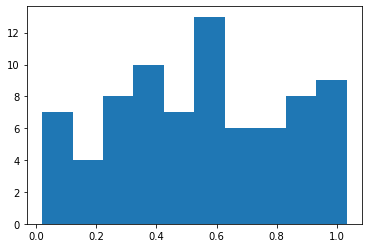

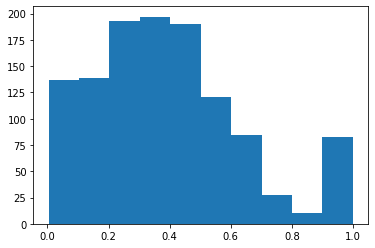

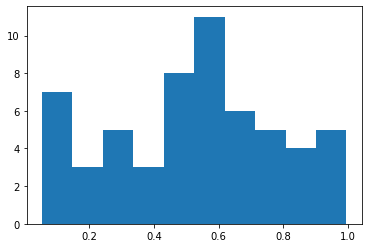

In [7]:
##compare percentage of english over time in both datasets
plt.hist(h100_subcharts['english_percentage'])
plt.show()
plt.hist(wdss.loc[wdss['peak_position'] > 1]['english_percentage'])
plt.show()
plt.hist(wdss.loc[wdss['peak_position'] <= 1]['english_percentage'])
plt.show()

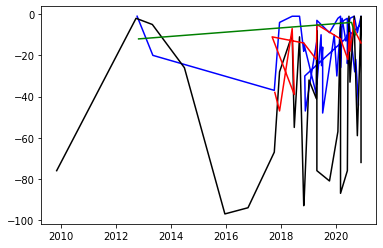

radio average % english 0.6809875241609559
streaming average % english 0.7281333730934844
sales average % english 0.5203071639240637
h100 average % english 0.6646930337256934


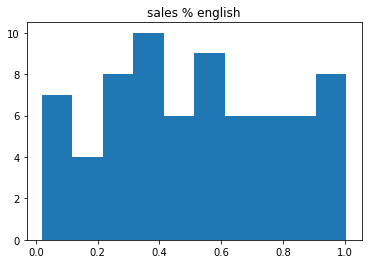

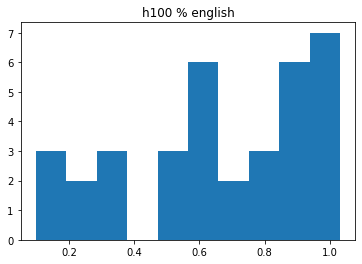

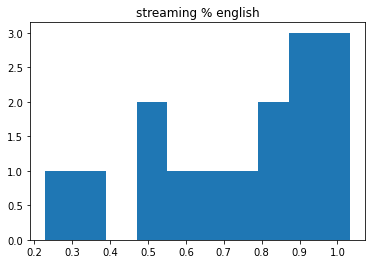

In [8]:
##compare billboard across streaming platforms
h100_subcharts.sort_values('chart_date', inplace=True) # sort by date

sales = h100_subcharts.loc[h100_subcharts['peak_position_sales'] > 0]
plt.plot(sales['chart_date_sales'], -1 * sales['peak_position_sales'], '-', color='blue')

h100 = h100_subcharts.loc[h100_subcharts['peak_position'] > 0]
plt.plot(h100['chart_date'], -1 * h100['peak_position'], '-', color='black')

streaming = h100_subcharts.loc[h100_subcharts['peak_position_streaming'] > 0]
plt.plot(streaming['chart_date_streaming'], -1 * streaming['peak_position_streaming'], '-', color='red')

radio = h100_subcharts.loc[h100_subcharts['peak_position_radio'] > 0]
plt.plot(radio['chart_date_radio'], -1 * radio['peak_position_radio'], '-', color='green')
plt.show()

print('radio average % english', np.mean(radio['english_percentage']))
print('streaming average % english', np.mean(streaming['english_percentage']))
print('sales average % english', np.mean(sales['english_percentage']))
print('h100 average % english', np.mean(h100['english_percentage']))

plt.hist(sales['english_percentage'])
plt.title('sales % english')
plt.show()

plt.hist(h100['english_percentage'])
plt.title('h100 % english')
plt.show()

plt.hist(streaming['english_percentage'])
plt.title('streaming % english')
plt.show()

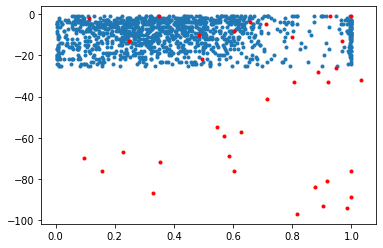

In [9]:
top_wdss = wdss.loc[wdss['peak_position'] == 1]
plt.plot(wdss['english_percentage'], -1*wdss['peak_position'], '.')
plt.plot(h100_subcharts['english_percentage'], -1*h100_subcharts['peak_position'], '.', color='red')

In [17]:
## analyze trends by year??
h100_subcharts['year_h100'] = [d.year if type(d) != type('') else d for d in h100_subcharts['chart_date']]
h100_subcharts['year_radio'] = [d.year if type(d) != type('') else d for d in h100_subcharts['chart_date_radio'] ]
h100_subcharts['year_streaming'] = [d.year if type(d) != type('') else d for d in h100_subcharts['chart_date_streaming'] ]
h100_subcharts['year_sales'] = [d.year if type(d) != type('') else d for d in h100_subcharts['chart_date_sales'] ]

wdss['year'] = [d.year for d in wdss['chart_date']]

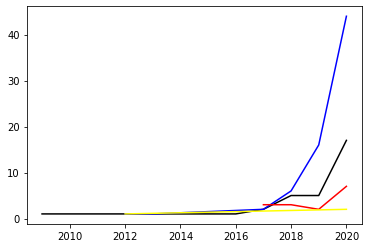

In [44]:
## plot number of songs per chart in each year
h100_year_counts = h100_subcharts['year_h100'].value_counts().sort_index()
radio_year_counts = h100_subcharts['year_radio'].value_counts().sort_index()
streaming_year_counts = h100_subcharts['year_streaming'].value_counts().sort_index()
sales_year_counts = h100_subcharts['year_sales'].value_counts().sort_index()

plt.plot(h100_year_counts.index, h100_year_counts.values, color='black')
plt.plot(sales_year_counts.index, sales_year_counts.values, color='blue')
plt.plot(streaming_year_counts.index, streaming_year_counts.values, color='red')
plt.plot(radio_year_counts.index, radio_year_counts.values, color='yellow')

In [40]:
h100_year_counts

2009.0     1
2012.0     1
2013.0     1
2014.0     1
2015.0     1
2016.0     1
2017.0     2
2018.0     5
2019.0     5
2020.0    17
Name: year_h100, dtype: int64